In [14]:
import pandas as pd
import seaborn as sns
import catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [15]:
# Tải dữ liệu Iris
iris_df = sns.load_dataset('iris')

In [16]:
# Chọn các cột số và nhãn
X = iris_df.drop(columns=['species'])
y = iris_df['species']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Khởi tạo CatBoostClassifier
model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='MultiClass', verbose=0)

# Huấn luyện mô hình
model.fit(X_train, y_train)

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



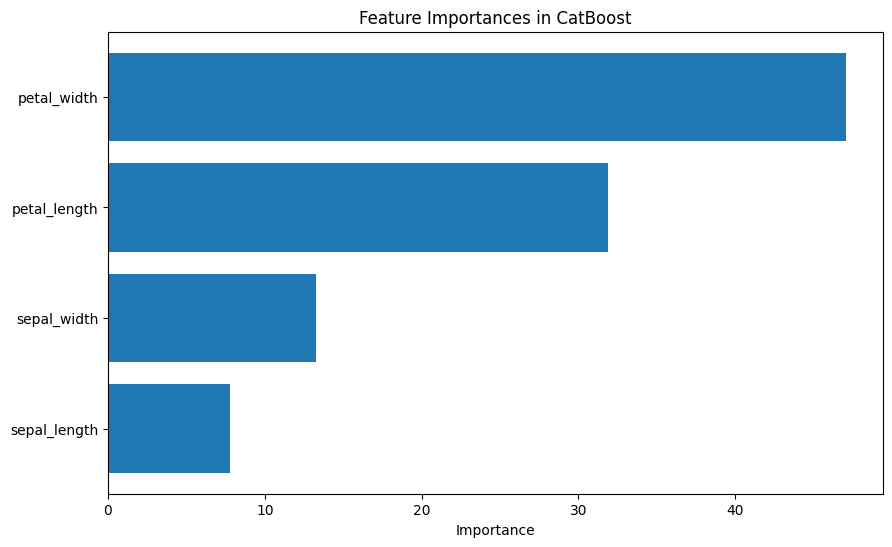

In [ ]:
import matplotlib.pyplot as plt

# Tầm quan trọng của các đặc trưng
feature_importances = model.get_feature_importance()
features = X.columns

# Vẽ đồ thị tầm quan trọng
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.title('Feature Importances in CatBoost')
plt.show()